In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import dataset
ds=pd .read_csv('SVR_R_dataset.csv')
ds

,X,Y
0,10,393.10
1,11,471.91
2,14,751.66
3,16,974.26
4,17,1096.39
5,18,1225.74
6,19,1362.31
7,20,1506.10
8,22,1815.34
9,24,2153.46


In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       23 non-null     int64  
 1   Y       23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [3]:
#x=ds.iloc[:,:-1].values #Volume
#x=ds.iloc[:,0:1].values #Volume
x=ds.iloc[:,[0]].values 
y=ds.iloc[:,1].values #Price
#print(x)
#print(y)

In [4]:
#x=ds.iloc[:,:-1].values #Volume
#x=ds.iloc[:,0:1].values #Volume
x=ds.iloc[:,[0]].values 
y=ds.iloc[:,1].values #Price

#calculate the correlation coefficient for the dataset
corr = ds.corr()
print(corr)

          X         Y
X  1.000000  0.881423
Y  0.881423  1.000000


In [5]:
#splitting the dataset into training and test sets
#use 20% for testing data
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split (x, y, test_size = 0.2, random_state = 0)

In [6]:
#SLR Step 2
#Fitting simple linear regression to training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

print('Coefficient,beta:',regressor.coef_) #coeff=b from y = a + bx
print('Constant,alpha:', regressor.predict([[0]])) # constant=a from y = a+ bx

Coefficient,beta: [472.22399522]
Constant,alpha: [-8713.35828827]


In [7]:
#Predicting the results for test set-Step 3
y_pred=regressor.predict(x_test)

In [8]:
print(y_pred) #predicted y

[ 4981.13757308  4036.68958265 24342.32137707  9231.15353006
 23397.87338664]


In [9]:
print(y_test) #actual y

[ 3125.11  2714.79 17901.1   5328.94 16898.74]


In [10]:
#calculate the correlation coefficient
corr=np.corrcoef(y_pred, y_test)
print(corr)

[[1.         0.99771314]
 [0.99771314 1.        ]]


In [11]:
#CALCULATE THE MEAN SQUARED ERROR
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print(MSE) #don't use for classification

20829518.979717504


In [12]:
#calculate the correlation coefficient
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
corr = df.corr()
print(corr)

             Actual  Predicted
Actual     1.000000   0.997713
Predicted  0.997713   1.000000


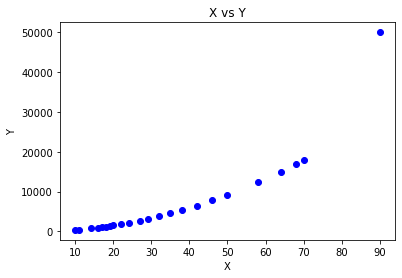

In [25]:
# visualizing the result
plt.scatter(x,y,color='blue')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [16]:
#step 4
#Fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg2= PolynomialFeatures(degree=2)
x_poly2=poly_reg2.fit_transform(x)

regressor2=LinearRegression()
regressor2.fit(x_poly2,y)

LinearRegression()

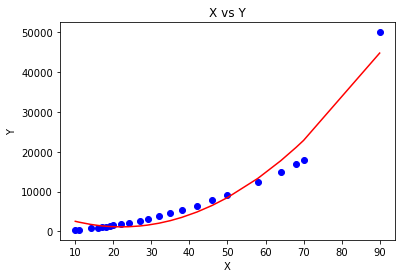

In [26]:
#visualizing the result
plt.scatter(x,y,color='blue')
plt.plot(x, regressor2.predict(x_poly2), color='red')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [27]:
#Fitting polynomial regression to the dataset
#use degree 5 for best fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg5= PolynomialFeatures(degree=5)
x_poly5=poly_reg5.fit_transform(x)
regressor5=LinearRegression()
regressor5.fit(x_poly5,y)

LinearRegression()

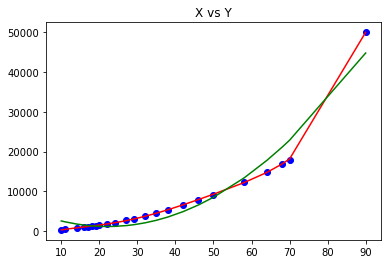

In [30]:
# Polynomial Linear Regression – Step 3:
# visualizing the result
plt.scatter(x,y,color='blue')
plt.plot(x, regressor5.predict(x_poly5), color='red') #this one better
plt.plot(x, regressor2.predict(x_poly2), color='green') 
plt.title('X vs Y')
plt.show()

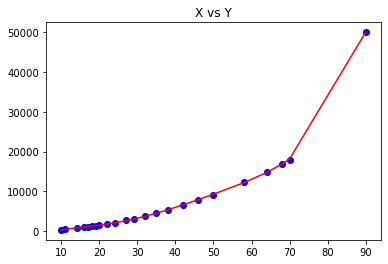

In [31]:
# Polynomial Linear Regression – Step 3:
# visualizing the result
plt.scatter(x,y,color='blue')
plt.plot(x, regressor5.predict(x_poly5), color='red') #this one better
plt.title('X vs Y')
plt.show()

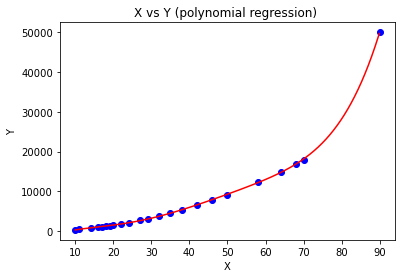

In [32]:
#visualizing the regression result(for higher resolution and smoother curve) 
x_grid = np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))

plt.scatter(x,y,color='blue')
plt.plot(x_grid, regressor5.predict(poly_reg5.fit_transform(x_grid)), color='red')
plt.title('X vs Y (polynomial regression) ')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [23]:
#Predict the price when the volume is 35. (degree 5)
y_predict=regressor5.predict(poly_reg5.fit_transform([[35]]))
print(y_predict)

[4502.56250036]
